In [7]:
import pandas as pd
import mlxtend as mle
import pickle
import numpy as np
from lightgbm import LGBMRegressor,LGBMClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from mlxtend.evaluate import PredefinedHoldoutSplit

%matplotlib inline

In [8]:
split = 0
tgt = 'label'
df = pd.read_pickle('../data/interim/holdout_lgbm.pck')
df = df[df['well_id'] <40]
model = LGBMClassifier(num_leaves=16,bagging_fraction = 0.5, learning_rate=0.08, n_estimators=300, 
                               objective='multiclass', random_state=123, n_jobs=1)
X = df.drop(["well_id", tgt,'row_id']+[f'label_{k}' for k in range(5)], axis=1)
y = df['label']


In [10]:
val_indices = X.index[df['well_id']>30]
cv = PredefinedHoldoutSplit(val_indices)

sfs =SFS(estimator=model,k_features = (10,30),
            floating=True, 
          scoring='f1_weighted',cv=cv,n_jobs=8,verbose= 1)
sfs = sfs.fit(X, y)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=8)]: Done 105 out of 105 | elapsed:   40.3s finished
Features: 1/30[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=8)]: Done 104 out of 104 | elapsed:   38.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.6s finished
Features: 2/30[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done 103 out of 103 | elapsed:   41.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    2.7s finished
Features: 3/30[Parallel(n_jobs=8)]: Using backend LokyBackend wi

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   39.9s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   16.1s finished
Features: 16/30[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   41.7s
[Parallel(n_jobs=8)]: Done  89 out of  89 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  16 | elapsed:   16.4s finished
Features: 17/30[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   45.5s
[Parallel(n_jobs=8)]: Done  88 out of  88 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  17 out of  17 | elapsed:   24.3s f

/home/anton/miniconda3/envs/pg_model/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anton/miniconda3/envs/pg_model/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


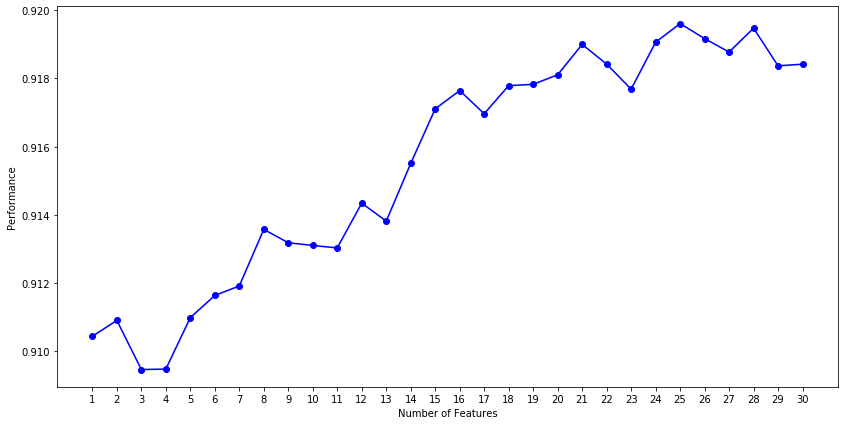

In [11]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (14,7))
#plt.ylim([-1.8,-1.3])

In [60]:
feats = sfs.get_metric_dict()[27]['feature_names']
set(X_train.columns) -set(feats)

{'ConfidentialReleaseDate',
 'DaysDrilling',
 'DrillMetresPerDay',
 'FinalDrillDate',
 'GroundElevation',
 'HZLength',
 'KBElevation',
 'LaheeClass',
 'LicenceDate',
 'Licensee',
 'ProjectedDepth',
 'SpudDate',
 'TotalDepth',
 '_Fracture`Stages',
 'cf_timediff',
 'final_timediff',
 'lic_timediff',
 'rrd_timediff',
 'st_timediff'}

{1: {'feature_idx': (37,),
  'cv_scores': array([-3.12105445, -2.40472374, -2.88149531, -2.55422945, -2.34325355]),
  'avg_score': -2.6609513000843683,
  'feature_names': ('UnitName',),
  'ci_bound': 0.380545340327349,
  'std_dev': 0.2960772031506285,
  'std_err': 0.14803860157531426},
 2: {'feature_idx': (0, 37),
  'cv_scores': array([-2.91610008, -2.18634687, -2.6516109 , -2.35737642, -2.1618713 ]),
  'avg_score': -2.4546611148818256,
  'feature_names': ('CurrentOperator', 'UnitName'),
  'ci_bound': 0.37202361518835403,
  'std_dev': 0.28944701148147906,
  'std_err': 0.14472350574073953},
 3: {'feature_idx': (0, 27, 37),
  'cv_scores': array([-2.36022114, -1.83490575, -2.25850098, -2.0122536 , -1.69084283]),
  'avg_score': -2.0313448584868903,
  'feature_names': ('CurrentOperator', 'StatusDate', 'UnitName'),
  'ci_bound': 0.3224282059741006,
  'std_dev': 0.25086009819373345,
  'std_err': 0.12543004909686672},
 4: {'feature_idx': (0, 5, 27, 37),
  'cv_scores': array([-2.01218397, -1.68